# Guião Laboratorial: Regressão Linear

Uso da regressão linear a uma variável para previsão do preço de casas. 

Area, número de quarto, pisos e idade + preço


# Conteúdo
- [ 1 - Bibliotecas ](#1)
- [ 2 - _Dataset_ ](#2)
- [ 3 - Notas sobre regressão linear](#3)
- [ 4 - Cálculo da função de custo](#4)
 - [ Exercício 1](#ex01)
- [ 5 - Descida do gradiente](#5)
    - [ Exercício 2](#ex02)
- [ 6 - Aprendizagem dos parâmetros usando a descida do gradiente](#6)
- [ 7 - Sistema SERT](#5)

<a name="1"></a>
## 1 - Bibilotecas 

Importar as bibliotecas necessárias para o tutorial.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

## 2 - _Dataset_

Carregar o _dataset_ (conjunto de dados) a ser usado: 
  - `x_train` é a área da casa
  - `y_train` é o preço das casas     

In [15]:
# carregar dataset
data = np.loadtxt("houses.txt", delimiter=',')
x_train = data[:,0]*0.092903   # feature - área: ft^2 -> m^2
y_train = data[:,4]            # saída - preço

#### Visualização das variáveis

In [16]:
# imprime x_train
print("Tipo de variável de x_train:",type(x_train))
print("Primeiros 5 elementos de x_train são:\n", x_train[:5]) 

Tipo de variável de x_train: <class 'numpy.ndarray'>
Primeiros 5 elementos de x_train são:
 [ 88.443656 115.571332 180.882141 160.257675 181.996977]


`x_train` é um _array_ `numpy` que contém valores reais positivos.
- Estes valores representam a área das casas em metros quadrados 

In [17]:
# imprime y_train
print("Tipo de variável de y_train:",type(y_train))
print("Primeiros 5 elementos de y_train são:\n", y_train[:5])  

Tipo de variável de y_train: <class 'numpy.ndarray'>
Primeiros 5 elementos de y_train são:
 [271.5 300.  509.8 394.  540. ]


`y_train` é um _array_  `numpy` que contém valores reais positivos.
- Estes valores representam o preço das casas, em unidades de 1000.
  - Por exemplo, 230 representa 230 000 dólares.  

#### Verificar as dimensões das variavéis

In [18]:
print ('A dimensão de x_train é:', x_train.shape)
print ('A dimensão de y_train é: ', y_train.shape)
print ('Número de exemplos de treino (m):', len(x_train))

A dimensão de x_train é: (100,)
A dimensão de y_train é:  (100,)
Número de exemplos de treino (m): 100


#### Visualização dos dados

É útil perceber o tipo de dados através da sua visualização.  

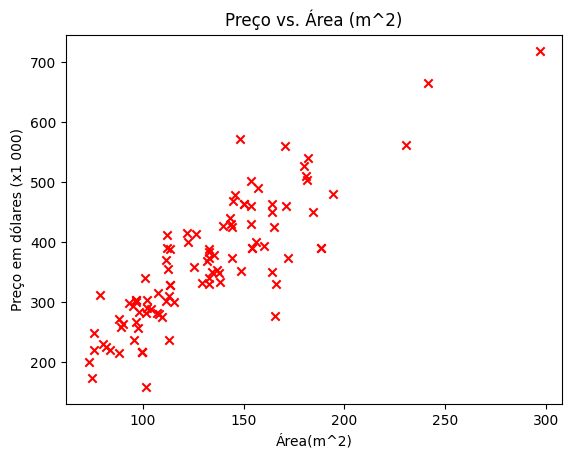

In [19]:
# Gráfico dos dados
plt.scatter(x_train, y_train, marker='x', c='r') 

# Labels
plt.title("Preço vs. Área (m^2)")
plt.ylabel('Preço em dólares (x1 000)')
plt.xlabel('Área(m^2)')
plt.show()

O objetivo é obter um modelo de regressão linear que aproxime os dados.
- Com este modelo, pode-se colocar como entrada a área da casa, e o modelo estima o preço correspondente da casa.

<a name="4"></a>
## 3 - Notas sobre regressão linear

Neste tutorial, os parâmetros de regressão linear $(w,b)$ irão ser ajustados ao seu _dataset_.
- A função do modelo para regressão linear, que é uma função que mapeia de `x` (área da casa) para `y` (preço da casa) é representada como
     $$f_{w,b}(x) = wx + b$$

- Para treinar um modelo de regressão linear, o objetivo é encontrar os melhores parâmetros $(w,b)$ que se ajustem ao seu _dataset_.

     - Para comparar como uma escolha de $(w,b)$ é melhor ou pior que outra escolha, é usada uma função de custo $J(w,b)$
       - $J$ é uma função de $(w,b)$. Ou seja, o valor do custo $J(w,b)$ depende do valor de $(w,b)$.
  
     - A escolha de $(w,b)$ que melhor se ajusta aos seus dados é aquela que tem o menor custo $J(w,b)$.


- Para encontrar os valores $(w,b)$ que obtenham o menor custo possível $J(w,b)$, pode ser usado um método chamado **descida do gradiente**.
   - A cada passo da descida do gradiente, os seus parâmetros $(w,b)$ aproximam-se dos valores ótimos que atingirão o menor custo $J(w,b)$.
 
- O modelo de regressão linear treinado pode então assumir a _feature_ de entrada $x$ (área da casa) e gerar uma previsão $f_{w,b}(x)$ (preço previsto para a casa).

<a name="5"></a>
## 5 - Cálculo da Função Custo

A descida do gradiente envolve passos repetidos para ajustar os valores dos seus parâmetros $(w,b)$ para obter gradualmente um valor de custo cada vez menor $J(w,b)$.
- Em cada passo da descida do gradiente, será útil monitorar seu progresso calculando o custo $J(w,b)$ à medida que $(w,b)$ é atualizado.
- Nesta seção, deverá ser implementada uma função para calcular $J(w,b)$ para que se possa verificar o progresso da implementação da descida do gradiente.

#### Função custo
A função de custo para a regressão linear $J(w,b)$ a uma variável é definida como

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- Pode-se pensar em $f_{w,b}(x^{(i)})$ como a previsão do modelo do preço da casa, em oposição a $y^{(i)}$, que é o preço real que é guardado nos dados.
- $m$ é o número de exemplos de treino no _dataset_

#### Previsão do modelo

- Para a regressão linear com uma variável, a previsão do modelo $f_{w,b}$ para um exemplo $x^{(i)}$ é representada como:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

Esta é a equação de uma reta, com uma interceptação $b$ e um declive $w$

#### Implementação

Complete a função `compute_cost()` abaixo para calcular o custo $J(w,b)$.

<a name="ex01"></a>
### Exercício 1

Complete a função `compute_cost` apresentada abaixo:

* Itere sobre os exemplos de treino e, para cada exemplo, calcule:

     * A previsão do modelo para esse exemplo
     $$
     f_{wb}(x^{(i)}) = wx^{(i)} + b
     $$
   
     * O custo para esse exemplo $$cost^{(i)} = (f_{wb} - y^{(i)})^2$$
    

* Retorne o custo total de todos os exemplos
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} custo^{(i)}$$
   * Aqui, $m$ é o número de exemplos de treino e $\sum$ é o operador de soma 

In [20]:
# compute_cost
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0

    ### INICIE O CÓDIGO AQUI ###
    
    
    
    
    ### TERMINE O CÓDIGO AQUI ### 

    return total_cost

<a name="6"></a>
## 5 - Descida do Gradiente

Nesta seção, irá ser implementado o gradiente para os parâmetros $w, b$ para a regressão linear.

O algoritmo de descida gradiente é:

$$\begin{align*}& \text{repetir até convergir:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

onde, os parâmetros $w, b$ são atualizados simultaneamente e onde
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* $m$ é o número de exemplos de treino no _dataset_

    
*  $f_{w,b}(x^{(i)})$ é a previsão do modelo, enquanto $y^{(i)}$, é o valor alvo 

Deverá ser implementada uma função chamada `compute_gradient` que calcula $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$

<a name="ex02"></a>
### Exercício 2

Complete a função `compute_gradient` para:

* Itere sobre os exemplos de treino e, para cada exemplo, calcule:
    * A previsão do modelo para esse exemplo 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * O gradiente para os parâmetros $w, b$ desse exemplo 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Retorne a atualização total do gradiente de todos os exemplos
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Aqui, $m$ é o número de exemplos de treinamento e $\sum$ é o operador de soma

In [21]:
# compute_gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### INICIE O CÓDIGO AQUI ### 
    
    
    
    
    
    ### TERMINE O CÓDIGO AQUI ### 
        
    return dj_dw, dj_db

<a name="2.6"></a>
## 6 - Aprendizagem dos parâmetros usando a descida do gradiente 

Agora irá ser encontrado os parâmetros ótimos de um modelo de regressão linear usando a descida do gradiente (em lote). A designação de "lote" refere-se à execução de todos os exemplos em uma iteração.
- Não é necessário implementar qualquer código. Basta correr as células abaixo.

- Uma forma de verificar se a descida gradiente está funcionando corretamente é visualizar
 o valor de $J(w,b)$ e verificar se este está diminuindo a cada iteração.

- Supondo que o gradiente e a função custo está implementada corretamente e tem um valor apropriado para a taxa de aprendizagem $\alpha$, $J(w,b)$ nunca deve aumentar e deve convergir para um valor estável ao final do algoritmo.

In [22]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Agora vamos executar o algoritmo da descida do gradiente para aprender os parâmetros do nosso _dataset_.

In [23]:
# inicializar os parâmetros de ajuste
initial_w = 0.2
initial_b = 20

# parâmetros da descida do gradiente
iterations = 2500
alpha = 0.0001

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("Valores de w,b encontrados pela descida do gradiente:", w, b)

Iteration    0: Cost     0.00   
Iteration  250: Cost     0.00   
Iteration  500: Cost     0.00   
Iteration  750: Cost     0.00   
Iteration 1000: Cost     0.00   
Iteration 1250: Cost     0.00   
Iteration 1500: Cost     0.00   
Iteration 1750: Cost     0.00   
Iteration 2000: Cost     0.00   
Iteration 2250: Cost     0.00   
Valores de w,b encontrados pela descida do gradiente: 0.2 20.0


Os parâmetros finais da descida do gradiente são agora usados para o gráfico do ajuste linear.

Lembre-se de que podemos obter a previsão para um único exemplo $f(x^{(i)})= wx^{(i)}+b$.

Para calcular as previsões em todo o _dataset_, podemos percorrer todos os exemplos de treino e calcular a previsão para cada exemplo. Isso é mostrado no bloco de código abaixo.

In [24]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Agora representamos graficamente os valores previstos para ver o ajuste linear.

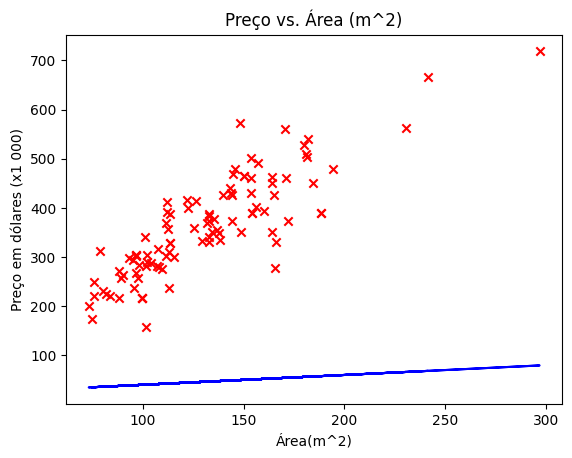

In [25]:
# Gráfico do ajuste linear
plt.plot(x_train, predicted, c = "b")

# Gráfico dos dados 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Labels
# Labels
plt.title("Preço vs. Área (m^2)")
plt.ylabel('Preço em dólares (x1 000)')
plt.xlabel('Área(m^2)')
plt.show()

Os valores finais de $w,b$ podem ser usados para fazer previsões sobre o preço das casas. Vamos prever qual seria o preço de casa com 125 $\rm{m^2}$ e 220 $\rm{m^2}$.

- O modelo considera a área como entrada.

- Portanto, 125 $\rm{m^2}$ podem ser traduzidas em uma entrada para o modelo como `np.array([125])`

- Da mesma forma, 220 $\rm{m^2}$ podem ser traduzidas em uma entrada para o modelo como `np.array([220])`

In [26]:
predict1 = 125 * w + b
print('Para uma área = 125, a previsão do preço é $%.2f' % (predict1*1000))

predict2 = 220 * w + b
print('Para uma área = 220, a previsão do preço é $%.2f' % (predict2*1000))

Para uma área = 125, a previsão do preço é $45000.00
Para uma área = 220, a previsão do preço é $64000.00


# 7 - Sistema SERT




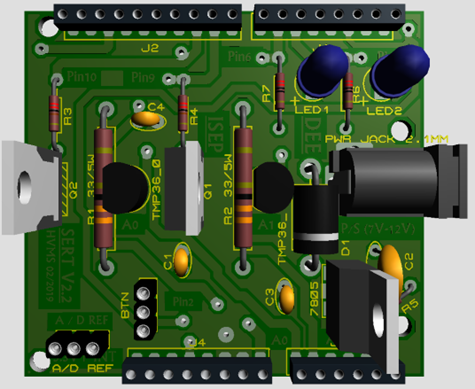





Defina o sistema 1 (`T1`) para 80% e o sistema 2 (`T2`) para 60%. Obtenha as temperaturas de ambos os sistemas a cada 0.5 segundos durante 50 segundos. Guarde os valores de tempo (`t`), temperatura do sensor 1 (`T_S1`) e temperatura do sensor 2 (`T_S2`) em matrizes `numpy`. 

In [ ]:
# SERT_Spyder.py

from pyfirmata import Arduino, util

import time
import numpy as np
import matplotlib.pyplot as plt

#%%
board = Arduino('COM3')

iterator = util.Iterator(board)
iterator.start()

# Entradas analógicas
T_S1 = board.get_pin('a:0:i') # A0
T_S2 = board.get_pin('a:1:i') # A1

# Saídas PWM
S1 = board.get_pin('d:10:p')  # Pino 10
S2 = board.get_pin('d:9:p')   # Pino 9

time.sleep(1)

# Função de conversão
def TEMP(val):
    return (val*5000.0-500.0)/10.0

# Funções temperaturas
def T1():
    return TEMP(T_S1.read())

def T2():
    return TEMP(T_S2.read())

#%% Resposta ao degrau
Ts = 1 # período de amostragem
tf = 600.0 # tempo final (10) - 400.0
n = int(np.round(tf/Ts+1)) # número de amostras
temp1 = np.zeros(n) # temperatura S1
temp2 = np.zeros(n) # temperatura S2
t = np.linspace(0,n-1,n)*Ts # tempo
u_s1 = 0.5 # 50% PWM - alternar com o u_s2 - quando é 0 os valores do sensor S1 não são considerádos
u_s2 = 0   # 50% PWM - alternar com o u_s1 - quando é 0 os valores do sensor S2 não são considerádos
# Entrada de controlo
u1 = np.ones(n)*u_s1
u2 = np.ones(n)*u_s2
print('u1   T1   u2   T2')
S1.write(u_s1)
S2.write(u_s2)
for i in range(n):
    # ler temperatura
    temp1[i] = T1()
    temp2[i] = T2()
    print(str(u1[i])+'   '+str(temp1[i])+'   '+str(u2[i])+'   '+str(temp2[i]))
    time.sleep(Ts)

# desligar S1
S1.write(0.0)   
# desligar S2
S2.write(0.0)
board.exit() # termina comunicação com placa

#%% Guardar dados
if u_s1!=0:
    dados = np.vstack((t,u1,temp1)).T
    np.savetxt('dados_S1.txt',dados,delimiter=',',\
            header='t,u,T1',comments='')

if u_s2!=0:
    dados = np.vstack((t,u2,temp2)).T
    np.savetxt('dados_S2.txt',dados,delimiter=',',\
            header='t,u,T2',comments='')


#%% Gráficos
if u_s1!=0:
    plt.figure()
    ax = plt.subplot(2,1,1)
    ax.grid()
    plt.plot(t,temp1,'k-',label='T1')
    plt.ylabel('Temperatura ($^oC$)')
    plt.legend(loc='best')
    ax = plt.subplot(2,1,2)
    ax.grid()
    plt.plot(t,u1,'b-',label='u')
    plt.ylabel('Controlo (%)')
    plt.xlabel('tempo (s)')
    plt.legend()
    plt.savefig('degrau_S1.png')
    plt.show()

if u_s2!=0:
    plt.figure()
    ax = plt.subplot(2,1,1)
    ax.grid()
    plt.plot(t,temp2,'k-',label='T2')
    plt.ylabel('Temperatura ($^oC$)')
    plt.legend(loc='best')
    ax = plt.subplot(2,1,2)
    ax.grid()
    plt.plot(t,u2,'b-',label='u')
    plt.ylabel('Controlo (%)')
    plt.xlabel('tempo (s)')
    plt.legend()
    plt.savefig('degrau_S2.png')
    plt.show()


### Regressão linear

Obtenha um modelo linear para `T_S1` usando regressão. Siga os mesmos pontos que no caso anterior do preço das casas.